In [1]:
import os
import cv2
import random
from imutils import paths

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
import  matplotlib.image as mpimg

In [2]:
HDG_images= os.listdir("Type_1 (Healthy dark green)")

In [3]:
print(HDG_images[: 5])
print(len(HDG_images))

['20250210_105946.jpg', '20250210_110150.jpg', '20250210_110252.jpg', '20250210_110407.jpg', '20250210_110447.jpg']
200


In [4]:
LightGreen= os.listdir('Type 2 ( Light Green)')

In [5]:
print(LightGreen[: 5])
print(len(LightGreen))

['20250217_121010.jpg', '20250217_121022.jpg', '20250217_121032.jpg', '20250217_121035.jpg', '20250217_121050.jpg']
200


In [6]:
YellowGreenMild= os.listdir('Type 3 (yellow & green mild)')

In [7]:
print(YellowGreenMild[: 5])
print(len(YellowGreenMild))

['20250210_134912.jpg', '20250210_134948.jpg', '20250210_135021.jpg', '20250210_135045.jpg', '20250210_135101.jpg']
200


In [8]:
PurpleSpots= os.listdir('Type 4 ( purple spots )')

In [9]:
print(PurpleSpots[: 5])
print(len(PurpleSpots))

['20250216_155457.jpg', '20250216_155513.jpg', '20250216_155529.jpg', '20250216_155604.jpg', '20250216_155611.jpg']
200


In [10]:
Yellow= os.listdir('Type 5 (Yellow)')

In [11]:
print(Yellow[: 5])
print(len(Yellow))

['20250216_165326.jpg', '20250216_165331.jpg', '20250216_165337.jpg', '20250216_165359.jpg', '20250216_165423.jpg']
200


In [13]:
import pandas as pd

data = {
    "Sno": [1, 2, 3, 4, 5],
    "Color": ["Healthy Dark Green", "Healthy Light Green", "Yellow+Green Patches", "Purple Spots", "Yellow"],
    "Chlorophyll": [4.89, 3.89, 2.61, 1.85, 1.21],  # Fixed decimal
    "Nitrogen (%)": [3.2, 2.5, 1.9, 1.6, 1.1],
    "Tannin": [3.95, 3.15, 2.55, 2.0, 1.4]
}

df = pd.DataFrame(data)
print(df)


   Sno                 Color  Chlorophyll  Nitrogen (%)  Tannin
0    1    Healthy Dark Green         4.89           3.2    3.95
1    2   Healthy Light Green         3.89           2.5    3.15
2    3  Yellow+Green Patches         2.61           1.9    2.55
3    4          Purple Spots         1.85           1.6    2.00
4    5                Yellow         1.21           1.1    1.40


#  Bar Plot for Chlorophyll, Nitrogen, and Tannin Readings

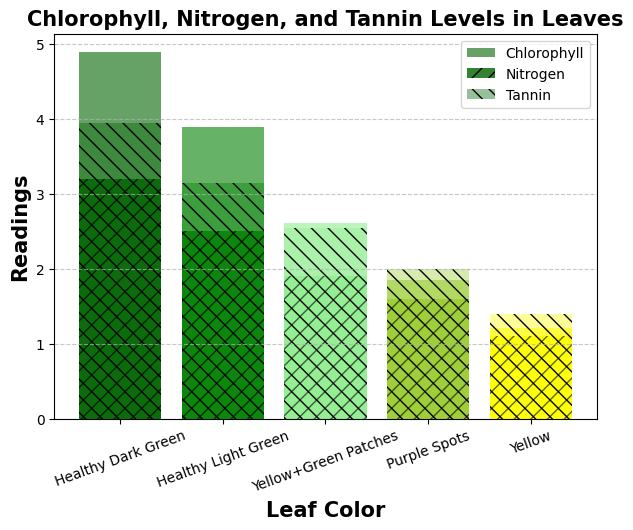

In [14]:
colors = ["darkgreen", "green", "lightgreen", "yellowgreen", "yellow"]
plt.figure(figsize=(7,5))

plt.bar(df["Color"], df["Chlorophyll"], color=colors, alpha=0.6, label="Chlorophyll")
plt.bar(df["Color"], df["Nitrogen (%)"], color=colors, alpha=0.8, label="Nitrogen", hatch="//")
plt.bar(df["Color"], df["Tannin"], color=colors, alpha=0.4, label="Tannin", hatch="\\\\")

plt.ylabel("Readings",fontsize=15,fontweight='bold')
plt.xlabel("Leaf Color",fontsize=15,fontweight='bold')
plt.title("Chlorophyll, Nitrogen, and Tannin Levels in Leaves",fontsize=15,fontweight='bold')
plt.legend()

plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [29]:
from skimage import color
from sklearn.decomposition import PCA

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ------------------------------
# 1. Define a function to convert RGB to HSI
# ------------------------------
def rgb_to_hsi(image):
    """
    Convert an RGB image to HSI.
    Note: This function assumes the input image is in RGB format.
    """
    # Normalize pixel values to [0, 1]
    image = image.astype(np.float32) / 255.0
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]
    
    # Intensity
    I = (R + G + B) / 3.0
    
    # Saturation calculation: Avoid division by zero with a small epsilon
    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-6)) * min_rgb
    
    # Hue calculation:
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B)) + 1e-6
    theta = np.arccos(num / den)
    
    # If B > G then adjust hue angle
    H = np.where(B > G, 2 * np.pi - theta, theta)
    # Normalize H to the range [0, 1]
    H = H / (2 * np.pi)
    
    # Stack channels into one image
    hsi_image = np.stack([H, S, I], axis=-1)
    return hsi_image

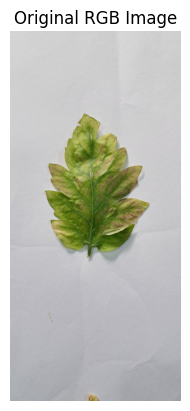

In [35]:
# Load an image using OpenCV
image_path = "Type 4 ( purple spots )/20250216_155513.jpg"  
  # Replace with your image path
rgb_image = cv2.imread(image_path)

# Convert from BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(rgb_image)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()


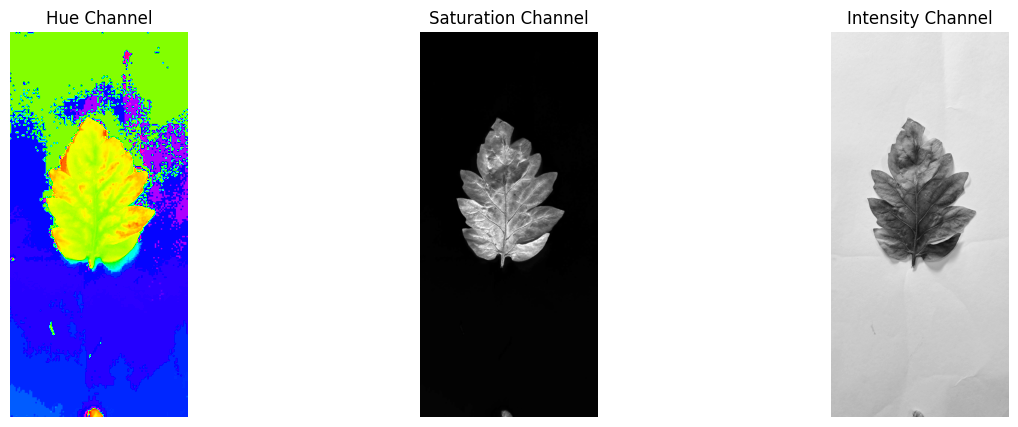

In [36]:
# Convert the RGB image to HSI
hsi_image = rgb_to_hsi(rgb_image)

# Split H, S, and I channels
H, S, I = hsi_image[:, :, 0], hsi_image[:, :, 1], hsi_image[:, :, 2]

# Display the HSI components
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(H, cmap="hsv")  # Hue visualization
axes[0].set_title("Hue Channel")
axes[0].axis("off")

axes[1].imshow(S, cmap="gray")  # Saturation visualization
axes[1].set_title("Saturation Channel")
axes[1].axis("off")

axes[2].imshow(I, cmap="gray")  # Intensity visualization
axes[2].set_title("Intensity Channel")
axes[2].axis("off")

plt.show()

# Converting all RBG images to HSI

In [38]:
from sklearn.preprocessing import LabelEncoder

In [41]:
dataset_dir = "all_leaves"  # Your dataset folder containing 5 sets of images

# Load and shuffle image paths
image_paths = sorted(list(paths.list_images('all_leaves')))
random.shuffle(image_paths)

# Initialize data and labels lists
data = []
labels = []

# Function to Convert RGB to HSI
def rgb_to_hsi(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
    return image

# Process each image
for path in image_paths:
    # Read image
    image = cv2.imread(path)
    
    # Convert to HSI
    hsi_image = rgb_to_hsi(image)
    
    # Resize to 224x224 for CNN
    hsi_image = cv2.resize(hsi_image, (224, 224))
    
    # Normalize pixel values to range -1 to 1
    hsi_image = (hsi_image / 255) - 1  # Scale between -1 to 1
    
   
    data.append(hsi_image)
    
   
    label = path.split(os.path.sep)[-2]
    labels.append(label)


data = np.array(data, dtype="float32")  # Ensure data type is float32
labels = np.array(labels)

# Encode labels into numerical format
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

print(f"✅ Processed {len(data)} images and {len(labels)} labels")
print(f"✅ Image shape: {data.shape}") 


✅ Processed 999 images and 999 labels
✅ Image shape: (999, 224, 224, 3)


In [42]:
data

array([[[[-1.        , -1.        , -0.2509804 ],
         [-0.5294118 , -0.9882353 , -0.24705882],
         [-0.5294118 , -0.9882353 , -0.23529412],
         ...,
         [-0.5294118 , -0.9882353 , -0.25882354],
         [-0.5294118 , -0.9882353 , -0.24313726],
         [-0.5294118 , -0.9882353 , -0.2509804 ]],

        [[-1.        , -1.        , -0.24705882],
         [-0.5294118 , -0.9882353 , -0.21568628],
         [-0.5294118 , -0.9882353 , -0.23137255],
         ...,
         [-0.5294118 , -0.9882353 , -0.22745098],
         [-0.5294118 , -0.9882353 , -0.24705882],
         [-0.5294118 , -0.9882353 , -0.24705882]],

        [[-1.        , -1.        , -0.22745098],
         [-1.        , -1.        , -0.24705882],
         [-0.5294118 , -0.9882353 , -0.23137255],
         ...,
         [-0.5294118 , -0.9882353 , -0.23921569],
         [-0.5294118 , -0.9882353 , -0.22745098],
         [-0.5294118 , -0.9882353 , -0.23529412]],

        ...,

        [[-0.5686275 , -0.98039216, -0

In [43]:
labels

array([2, 4, 0, 0, 2, 3, 0, 2, 4, 3, 0, 0, 2, 4, 3, 3, 3, 3, 1, 4, 4, 3,
       2, 4, 4, 0, 0, 0, 1, 3, 0, 4, 2, 1, 2, 4, 4, 1, 3, 3, 0, 1, 1, 4,
       4, 0, 0, 0, 2, 4, 3, 1, 2, 0, 0, 1, 3, 0, 4, 4, 0, 1, 1, 4, 3, 4,
       4, 0, 1, 4, 4, 1, 2, 2, 4, 3, 2, 3, 2, 3, 3, 4, 2, 4, 1, 2, 1, 4,
       0, 0, 1, 4, 4, 4, 1, 2, 0, 3, 4, 1, 0, 3, 4, 1, 2, 2, 2, 1, 2, 2,
       0, 4, 3, 1, 1, 2, 3, 0, 1, 4, 4, 3, 4, 3, 3, 4, 0, 4, 3, 3, 3, 1,
       2, 2, 2, 0, 1, 0, 1, 2, 3, 1, 1, 1, 0, 1, 2, 2, 2, 4, 1, 4, 2, 3,
       1, 4, 3, 4, 4, 3, 1, 3, 2, 0, 2, 3, 3, 0, 1, 4, 2, 1, 3, 3, 4, 4,
       2, 0, 0, 1, 1, 1, 4, 3, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 4, 4, 0,
       2, 3, 4, 0, 4, 4, 2, 4, 2, 1, 4, 3, 3, 0, 0, 3, 0, 3, 1, 2, 2, 3,
       1, 0, 4, 2, 4, 0, 4, 3, 0, 2, 0, 0, 1, 3, 2, 0, 2, 4, 4, 2, 2, 3,
       2, 1, 3, 3, 2, 3, 4, 1, 2, 3, 0, 0, 3, 4, 0, 3, 4, 1, 2, 1, 0, 2,
       3, 0, 3, 3, 2, 2, 1, 0, 4, 0, 3, 1, 2, 2, 0, 2, 3, 3, 2, 0, 4, 2,
       0, 0, 0, 3, 3, 1, 2, 4, 0, 2, 1, 1, 4, 0, 1,

In [45]:
image = cv2.imread('Type 4 ( purple spots )/20250216_155513.jpg')
def extract_spectral_features(image):
    """
    Convert RGB to HSV (approximation of HSI) and extract spectral data.
    """
    # Convert image from RGB to HSV
    hsv_image = cv2.cvtColor((image * 255).astype("uint8"), cv2.COLOR_RGB2HSV)
    
    # Split channels
    H, S, V = cv2.split(hsv_image)
    
    # Normalize values for spectral analysis
    H = H / 180.0  
    S = S / 255.0
    V = V / 255.0

    # Create a spectral signature (mean reflectance across pixels)
    spectral_signature = np.mean([H, S, V], axis=(1, 2))  # Mean over image

    return spectral_signature

In [46]:
spectral_data = []
  
spectral_signature = extract_spectral_features(image)
spectral_data.append(spectral_signature)
spectral_data = np.array(spectral_data)

In [47]:
spectral_data=[]
labels=[]

for path in image_paths:
    # Read image
    image = cv2.imread(path)
    spectral = extract_spectral_features(image)
    spectral_data.append(spectral)
    label = path.split(os.path.sep)[-2]
    labels.append(label)
    
spectral_data = np.array(spectral_data)

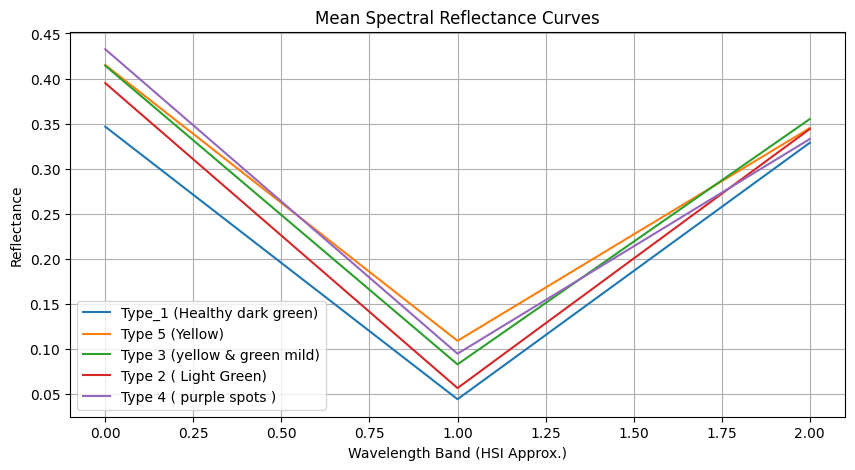

In [48]:
plt.figure(figsize=(10, 5))
for i, label in enumerate(set(labels)):
    class_indices = [j for j in range(len(labels)) if labels[j] == label]
    class_spectra = spectral_data[class_indices]
    
    # Compute mean spectrum for class
    mean_spectrum = np.mean(class_spectra, axis=0)
    
    # Plot
    plt.plot(mean_spectrum, label=label)

plt.xlabel("Wavelength Band (HSI Approx.)")
plt.ylabel("Reflectance")
plt.title("Mean Spectral Reflectance Curves")
plt.legend()
plt.grid(True)
plt.show()

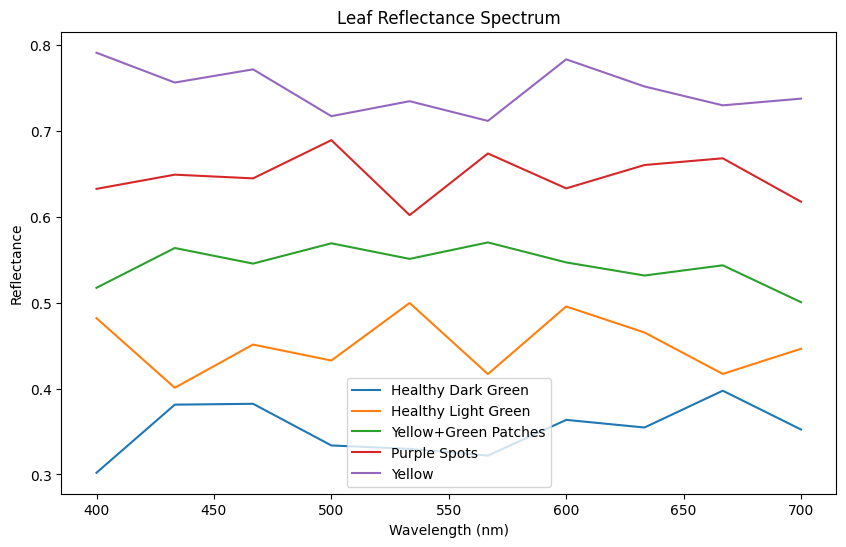

In [50]:
# Generate Reflectance Graphs (Simulated data)
wavelengths = np.linspace(400, 700, 10)  # Simulated wavelength range (400-700 nm)

# Simulated reflectance values for each category
reflectance_values = {
    "Healthy Dark Green": np.random.uniform(0.3, 0.4, len(wavelengths)),
    "Healthy Light Green": np.random.uniform(0.4, 0.5, len(wavelengths)),
    "Yellow+Green Patches": np.random.uniform(0.5, 0.6, len(wavelengths)),
    "Purple Spots": np.random.uniform(0.6, 0.7, len(wavelengths)),
    "Yellow": np.random.uniform(0.7, 0.8, len(wavelengths)),
}

# Plot Reflectance Graphs
plt.figure(figsize=(10, 6))
for category, values in reflectance_values.items():
    plt.plot(wavelengths, values, label=category)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Leaf Reflectance Spectrum")
plt.legend()
plt.show()

In [1]:
import os
import pandas as pd

# Define the main folder containing all images
main_folder = "all_leaves"  # Update with the correct path

# Define categories based on actual folder names
categories = {
    "Type_1 (Healthy dark green)": "Healthy",
    "Type 2 ( Light Green)": "Deficient",  # Fixed space issue
    "Type 3 (yellow & green mild)": "Deficient",
    "Type 4 ( purple spots )": "Toxic",  # Fixed space issue
    "Type 5 (Yellow)": "Toxic"
}

# Check if main folder exists
if not os.path.exists(main_folder):
    print(f"Error: The folder '{main_folder}' does not exist.")
else:
    print("Subfolders found in 'all_leaves':", os.listdir(main_folder))

# Prepare a list to store data
data = []

# Loop through each category folder
for folder, label in categories.items():
    folder_path = os.path.join(main_folder, folder)

    if os.path.exists(folder_path):
        images = [img for img in os.listdir(folder_path) if img.endswith((".jpg", ".png", ".jpeg"))]
        print(f"Folder '{folder}': Found {len(images)} images")

        for image_name in images:
            data.append([image_name, label])
    else:
        print(f"Warning: Folder '{folder}' does not exist.")

# Check if any data was collected
if not data:
    print("No images found. Please check the folder paths and filenames.")
else:
    # Create a DataFrame and save to CSV
    df = pd.DataFrame(data, columns=["Image_Name", "Image_Category"])
    df.to_csv("image_labels.csv", index=False)
    print(f"CSV file 'image_labels.csv' created successfully with {len(df)} entries!")


Subfolders found in 'all_leaves': ['Test', 'Train', 'Type 2 ( Light Green)', 'Type 3 (yellow & green mild)', 'Type 4 ( purple spots )', 'Type 5 (Yellow)', 'Type_1 (Healthy dark green)']
Folder 'Type_1 (Healthy dark green)': Found 200 images
Folder 'Type 2 ( Light Green)': Found 199 images
Folder 'Type 3 (yellow & green mild)': Found 200 images
Folder 'Type 4 ( purple spots )': Found 200 images
Folder 'Type 5 (Yellow)': Found 200 images
CSV file 'image_labels.csv' created successfully with 999 entries!


In [2]:
data

[['20250210_105946.jpg', 'Healthy'],
 ['20250210_110150.jpg', 'Healthy'],
 ['20250210_110252.jpg', 'Healthy'],
 ['20250210_110407.jpg', 'Healthy'],
 ['20250210_110447.jpg', 'Healthy'],
 ['20250210_110533.jpg', 'Healthy'],
 ['20250210_110618.jpg', 'Healthy'],
 ['20250210_110745.jpg', 'Healthy'],
 ['20250210_110844.jpg', 'Healthy'],
 ['20250210_110954.jpg', 'Healthy'],
 ['20250210_111044.jpg', 'Healthy'],
 ['20250210_111127.jpg', 'Healthy'],
 ['20250210_111216.jpg', 'Healthy'],
 ['20250210_111241.jpg', 'Healthy'],
 ['20250210_111313.jpg', 'Healthy'],
 ['20250210_111329.jpg', 'Healthy'],
 ['20250210_111457.jpg', 'Healthy'],
 ['20250210_111514.jpg', 'Healthy'],
 ['20250210_111604.jpg', 'Healthy'],
 ['20250210_111713.jpg', 'Healthy'],
 ['20250210_111814.jpg', 'Healthy'],
 ['20250210_111919.jpg', 'Healthy'],
 ['20250210_112013.jpg', 'Healthy'],
 ['20250210_112318.jpg', 'Healthy'],
 ['20250210_112455.jpg', 'Healthy'],
 ['20250210_112528.jpg', 'Healthy'],
 ['20250210_112606.jpg', 'Healthy'],
 

# Classify Leaves Using Chemical Properties

In [131]:
import pandas as pd
import numpy as np

# Load image labels dataset
file_path = "image_labels.csv"

try:
    df = pd.read_csv(file_path)

    # Add sample chemical properties (Random Values for Testing)
    np.random.seed(42)
    df["Chlorophyll"] = np.random.uniform(1.5, 4.5, size=len(df))
    df["Nitrogen (%)"] = np.random.uniform(1.0, 3.0, size=len(df))
    df["Tannin"] = np.random.uniform(1.0, 4.0, size=len(df))

    # Save the new dataset
    df.to_csv("leaf_data.csv", index=False)
    print("✅ 'leaf_data.csv' has been created successfully!")
    
except FileNotFoundError:
    print(f"❌ Error: '{file_path}' not found. Please ensure it exists.")


✅ 'leaf_data.csv' has been created successfully!


In [132]:
import pandas as pd

# Function to classify leaves based on chemical properties
def classify_leaf(row):
    if row['Chlorophyll'] >= 3.8 and row['Nitrogen (%)'] >= 2.5 and row['Tannin'] >= 3.0:
        return 'Healthy'
    elif row['Chlorophyll'] >= 2.5 and row['Nitrogen (%)'] >= 1.9 and row['Tannin'] >= 2.5:
        return 'Deficient'
    else:
        return 'Toxic'

# Load dataset
file_path = "leaf_data.csv"

try:
    # Read CSV and strip column names
    df_chemical = pd.read_csv(file_path)
    df_chemical.columns = df_chemical.columns.str.strip()

    # Check if required columns exist
    required_columns = ['Chlorophyll', 'Nitrogen (%)', 'Tannin']
    missing_columns = [col for col in required_columns if col not in df_chemical.columns]

    if missing_columns:
        raise KeyError(f"Missing columns: {missing_columns}")

    # Convert columns to numeric (handle errors)
    df_chemical[required_columns] = df_chemical[required_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values
    df_chemical.dropna(subset=required_columns, inplace=True)

    # Apply classification function
    df_chemical['Chemical_Category'] = df_chemical.apply(classify_leaf, axis=1)

    # Save the classified dataset
    output_file = "leaf_data_classified.csv"
    df_chemical.to_csv(output_file, index=False)
    print(f"✅ Classification completed! File saved as '{output_file}' with {len(df_chemical)} rows.")

except FileNotFoundError:
    print(f"❌ Error: The file '{file_path}' was not found. Please check the file path.")
except KeyError as e:
    print(f"❌ Error: {e}. Ensure the dataset has the required columns: {required_columns}")
except Exception as e:
    print(f"❌ Unexpected error: {e}")


✅ Classification completed! File saved as 'leaf_data_classified.csv' with 999 rows.


In [133]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [134]:
train_dir = "all_leaves/Train"
test_dir = "all_leaves/Test"


In [135]:
# Image Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True
)

In [136]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [137]:
import os

# Define base directory
base_dir = r"C:\Users\shivani\Desktop\Cnn project(S)\all_leaves"

# Define subdirectories
train_dir = os.path.join(base_dir, "Train")
test_dir = os.path.join(base_dir, "Test")

# Define class names
classes = ["Healthy", "Deficient", "Toxic"]

# Create Train and Test directories if they do not exist
for folder in [train_dir, test_dir]:
    if not os.path.exists(folder):
        os.makedirs(folder)

    # Create class folders inside Train and Test
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        if not os.path.exists(class_path):
            os.makedirs(class_path)

print("✅ Folder structure created successfully!")


✅ Folder structure created successfully!


In [138]:
import os

train_dir = r"C:\Users\shivani\Desktop\Cnn project(S)\all_leaves\Train"
test_dir = r"C:\Users\shivani\Desktop\Cnn project(S)\all_leaves\Test"

if os.path.exists(train_dir):
    print("✅ Train directory exists!")
    print("Classes in Train:", os.listdir(train_dir))

if os.path.exists(test_dir):
    print("✅ Test directory exists!")
    print("Classes in Test:", os.listdir(test_dir))


✅ Train directory exists!
Classes in Train: ['Deficient', 'Healthy', 'Toxic']
✅ Test directory exists!
Classes in Test: ['Deficient', 'Healthy', 'Toxic']


# Import Required Libraries

In [108]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load & Preprocess Data

In [109]:
# Define image size & batch size
IMG_SIZE = (150, 150)  
BATCH_SIZE = 32


In [139]:
# Image data generators for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill in any new pixels created during transformations
)

In [140]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for testing


In [141]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    shuffle=True
)


Found 600 images belonging to 3 classes.


In [142]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    shuffle=False
)


Found 600 images belonging to 3 classes.


In [143]:
from tensorflow.keras import layers, models

In [148]:
# Build the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output for the fully connected layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer
    layers.Dense(3, activation='softmax')  # 3 output classes (Deficient, Healthy, Toxic)
])

In [149]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

In [150]:
# Summarize the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [151]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Number of epochs can be adjusted
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.3495 - loss: 1.7472 - val_accuracy: 0.3819 - val_loss: 1.0319
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4375 - loss: 1.0324 - val_accuracy: 0.3854 - val_loss: 1.0634
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.5330 - loss: 0.9325 - val_accuracy: 0.6910 - val_loss: 0.5391
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7500 - loss: 0.6298 - val_accuracy: 0.6528 - val_loss: 0.5456
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.6925 - loss: 0.5659 - val_accuracy: 0.4531 - val_loss: 1.5970
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7188 - loss: 0.5571 - val_accuracy: 0.8785 - val_loss: 0.3431
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.7460 - loss: 0.4709 - val_accuracy: 0.7830 - val_loss: 0.3854
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5625 - loss: 0.7635 - val_accuracy: 0.8715 - val_loss:

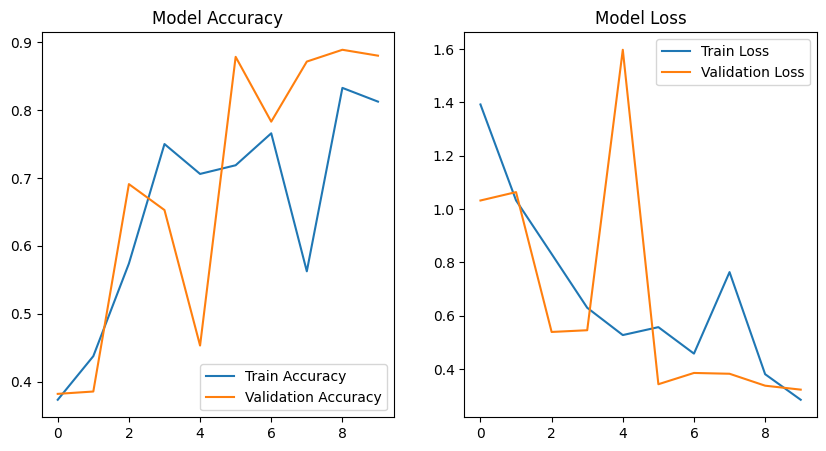

In [152]:
model.save("resnet_sweet_basil.h5")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

# Prediction on test data

In [163]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict the class of a given image
def predict_image(img_path):
    # Load the image with the correct target size (150x150)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions using the model
    predictions = model.predict(img_array)

    # Get the class labels (use the same labels as in training)
    class_labels = ["Deficient", "Healthy", "Toxic"]

    # Get the predicted class
    predicted_class = class_labels[np.argmax(predictions)]

    print(f"Predicted Class: {predicted_class}")

# Example usage:
predict_image("test.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted Class: Deficient


In [167]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict the class of a given image
def predict_image(img_path):
    # Load the image with the correct target size (150x150)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions using the model
    predictions = model.predict(img_array)

    # Get the class labels (use the same labels as in training)
    class_labels = ["Deficient", "Healthy", "Toxic"]

    # Get the predicted class
    predicted_class = class_labels[np.argmax(predictions)]

    print(f"Predicted Class: {predicted_class}")

# Example usage:
predict_image("test2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Class: Healthy


# Classification & Confusion matrix

In [170]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adjust input shape to the one the model was trained with
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the test data
    target_size=(150, 150), 
    batch_size=32,  # Batch size
    class_mode='categorical',  # Multi-class classification
    shuffle=False  
)

# Predict with the model
y_pred_probs = model.predict(test_generator)  
y_pred = np.argmax(y_pred_probs, axis=1)  

# Get true labels
y_true = test_generator.classes

# Calculate classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


Found 600 images belonging to 3 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       200
           1       0.91      1.00      0.95       200
           2       0.91      0.73      0.81       200

    accuracy                           0.85       600
   macro avg       0.86      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600

Confusion Matrix:
 [[166  20  14]
 [  0 200   0]
 [ 53   0 147]]
